In [1]:
import hc_lib.plots.figlib as flib
flib.siteFG()
from figrid.figrid import DataList
from figrid.figrid import Figrid
import numpy as np
import matplotlib as mpl

In [2]:
box = 'tng100'
snap = [99, 67]
axis = 0
res = 800
files = ['hiptlXgalaxy', 'vnXgalaxy']
master = DataList()
for f in files:
    for s in snap:
        rlib = flib.load(box, s, axis, res, f)
        kmin = rlib.results['pk'][0].xvalues[0]
        master.loadResults(rlib.results['pk'])


In [3]:
smfont = 10
larfont = 12

In [ ]:
def space_compare(ip, allcolor, withlegend, name):
    withall = 'resolved' in ip['color']
    dl = DataList(master.getMatching(ip))
    rsd = flib.makeRSD(dl)
    rsddl = DataList(rsd)
    fgrsd = Figrid(rsddl)
    fgrsd.arrange('ratio', 'is_particle', panel_length = 2)
    fkw = {}
    fkw['label'] = 'Blue Galaxies'
    fkw['color'] = 'blue'
    fkw['alpha'] = 0.35
    fgrsd.makeFills({'color':'blue'}, fkw)
    fkw['label'] = 'Red Galaxies'
    fkw['color'] = 'red'
    fgrsd.makeFills({'color':'red'}, fkw)
    if withall:
        fkw['label'] = 'All Galaxies'
        fkw['color'] = allcolor
        fgrsd.makeFills({'color':'resolved'}, fkw)

    dl = DataList(master.getMatching(ip))
    fg = Figrid(dl)
    if withall:
        fg.setColOrder(['blue', 'red', 'resolved'])
    else:
        fg.setColOrder(['blue', 'red'])
    fg.arrange('color', 'is_particle', panel_length = 2, panel_bt = 0.11, yborder = 0.3)
    pargs = {}
    pargs['label'] = 'Redshift Space'
    pargs['color'] = 'tan'
    pargs['alpha'] = 0.55
    fg.makeFills({'space':'real'}, pargs)
    pargs['label'] = 'Real Space'
    pargs['color'] = 'gray'
    fg.makeFills({'space':'redshift'}, pargs)
    pkslc = (slice(0,fg.dim[0]-1), slice(None))
    # fix the axes
    axparams = {}
    flib.setNyq(fg, kmin, res, box)
    axparams['xscale'] = 'log'
    axparams['ylim'] = [0, 1.5]
    fg.setAxisParams(axparams)
    axparams['yscale'] = 'log'
    axparams['ylim'] = [0.1, 1e4]
    fg.setAxisParams(axparams, slc=pkslc)
    fg.setDefaultTicksParams()
    fg.setTicks({'labelsize':smfont, 'direction':'in'})
    kw = {'fontsize':larfont}
    ypos = [0, 1 - 0.5*(fg.panel_length * 3 + fg.panel_bt[1] * 2 + fg.yborder[1]) / fg.figsize[1]]
    flib.pklabels(fg, ysub = r'\rm{HI-gal}', ypos = ypos, xtxtkw = kw, ytxtkw = kw)
    txtkw = {}
    txtkw['ha'] = 'center'
    txtkw['va'] = 'top'
    txtkw['fontsize'] = smfont
    fg.setRowLabels(['Blue Galaxies', 'Red Galaxies', 'All Galaxies', 'Redshift Space\nDistortions'], [0.5, 0.95],
                txtkw)
    fg.makeYLabel(r'P$_{\rm{s}}$ (k) / P$_{\rm{r}}$ (k)', 
                [0, (0.5 * fg.panel_length + fg.yborder[0]) / fg.figsize[1]], 
                {'va':'center', 'fontsize':larfont})
    lkw = {'frameon':False, 'fontsize':smfont - 1, 'loc':'lower left'}
    fg.drawLegend(lkw, (0,0))
    lkw['loc'] = 'center right'
    if withlegend:
        fg.drawLegend(lkw, (fg.dim[0]-1,0))
    fcolors = np.empty(fg.dim, dtype = object)
    trgba = mpl.colors.to_rgba
    alpha = 0.15
    if withall:
        fcolors[:,0] = [trgba('blue', alpha), trgba('red', alpha), trgba(allcolor, alpha), trgba('white')]
    else:
        fcolors[:,0] = [trgba('blue', alpha), trgba('red', alpha), trgba('white')]
    flib.setFacecolor(fg, fcolors)
    flib.plotOnes(fg, (fg.dim[0]-1,0))
    fg.save(name)
    return

In [ ]:
withall = ['red', 'blue', 'resolved']
noall = ['red', 'blue']
allcolor = ['purple', 'green', 'gray']
wlegend = [True, False]
for a in [withall, noall]:
    for c in allcolor:

        for ss in [99, 67]:
            for leg in wlegend:
                isall = a is withall
                if isall:
                    allstr = 'withall_%s'%c
                else:
                    allstr = 'noall'

                if leg:
                    legstr = 'withlegend'
                else:
                    legstr = 'nolegend'
                name = 'space_%s_%s_%03d'%(allstr, legstr, ss)

                ip = {}
                ip['snapshot'] = ss
                ip['color'] = a
                
                space_compare(ip, c, leg, name)
        

The row values for ratio: ['no key found']
The column values for is_particle: [False]


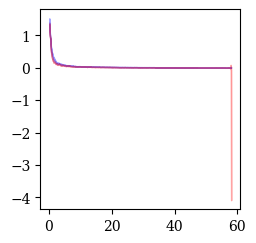

In [4]:
# make ratios
ip = {'snapshot':99}
dl = DataList(master.getMatching(ip))
rsd = flib.makeRSD(dl)
rsddl = DataList(rsd)
fgrsd = Figrid(rsddl)
fgrsd.arrange('ratio', 'is_particle', panel_length = 2)
fkw = {}
fkw['label'] = 'Blue Galaxies'
fkw['color'] = 'blue'
fkw['alpha'] = 0.35
fgrsd.makeFills({'color':'blue'}, fkw)
fkw['label'] = 'Red Galaxies'
fkw['color'] = 'red'
fgrsd.makeFills({'color':'red'}, fkw)
fkw['label'] = 'All Galaxies'
fkw['color'] = 'purple'
fgrsd.makeFills({'color':'resolved'}, fkw)
fgrsd.plot()

In [5]:
%%capture
ip = {'snapshot':99}
dl = DataList(master.getMatching(ip))
fg = Figrid(dl)
fg.setColOrder(['blue', 'red', 'resolved'])
fg.arrange('color', 'is_particle', panel_length = 2, panel_bt = 0.11, yborder = 0.3)
pargs = {}
pargs['label'] = 'Redshift Space'
pargs['color'] = 'tan'
pargs['alpha'] = 0.55
fg.makeFills({'space':'real'}, pargs)
pargs['label'] = 'Real Space'
pargs['color'] = 'gray'
fg.makeFills({'space':'redshift'}, pargs)

In [6]:
%%capture
fg.combineFigrids(fgrsd);

In [7]:
box = dl.getAttrVals('box')[0]
res = dl.getAttrVals('grid_resolution')[0]


In [8]:
fg.plot()

pkslc = (slice(0,3), slice(None))
# fix the axes
axparams = {}
flib.setNyq(fg, kmin, res, box)
axparams['xscale'] = 'log'
axparams['ylim'] = [0, 1.5]
fg.setAxisParams(axparams)
axparams['yscale'] = 'log'
axparams['ylim'] = [0.1, 1e4]
fg.setAxisParams(axparams, slc=pkslc)

In [9]:
# fix the tick labels
fg.setDefaultTicksParams()
fg.setTicks({'labelsize':smfont, 'direction':'in'})

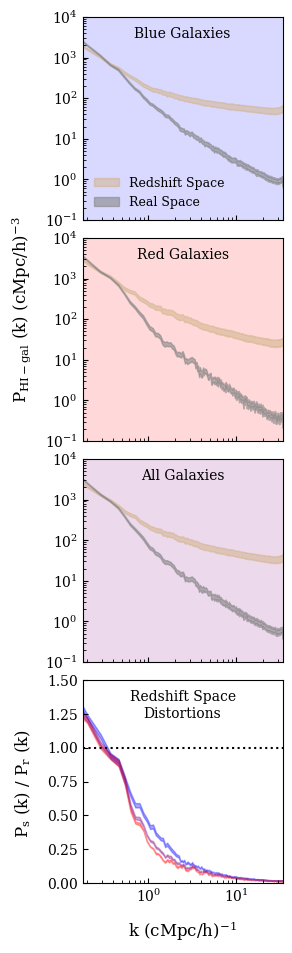

In [10]:
# labels
kw = {'fontsize':larfont}
ypos = [0, 1 - 0.5*(fg.panel_length * 3 + fg.panel_bt[1] * 2 + fg.yborder[1]) / fg.figsize[1]]
flib.pklabels(fg, ysub = r'\rm{HI-gal}', ypos = ypos, xtxtkw = kw, ytxtkw = kw)
txtkw = {}
txtkw['ha'] = 'center'
txtkw['va'] = 'top'
txtkw['fontsize'] = smfont
fg.setRowLabels(['Blue Galaxies', 'Red Galaxies', 'All Galaxies', 'Redshift Space\nDistortions'], [0.5, 0.95],
               txtkw)
fg.makeYLabel(r'P$_{\rm{s}}$ (k) / P$_{\rm{r}}$ (k)', 
              [0, (0.5 * fg.panel_length + fg.yborder[0]) / fg.figsize[1]], 
              {'va':'center', 'fontsize':larfont})
lkw = {'frameon':False, 'fontsize':smfont - 1, 'loc':'lower left'}
fg.drawLegend(lkw, (0,0))
lkw['loc'] = 'center right'
#fg.drawLegend(lkw, (3,0))
fcolors = np.empty(fg.dim, dtype = object)
trgba = mpl.colors.to_rgba
alpha = 0.15
fcolors[:,0] = [trgba('blue', alpha), trgba('red', alpha), trgba('purple', alpha), trgba('white')]
flib.setFacecolor(fg, fcolors)
flib.plotOnes(fg, (3,0))
fg.fig

In [11]:
fg.save("rsd_all_purple_no_legend.pdf")

In [12]:
%%capture
# make ratios
ip = {'snapshot':99, 'color':['red', 'blue']}
dl = DataList(master.getMatching(ip))
rsd = flib.makeRSD(dl)
rsddl = DataList(rsd)
fgrsd = Figrid(rsddl)
fgrsd.arrange('ratio', 'is_particle', panel_length = 2)
fkw = {}
fkw['label'] = 'Blue\nGalaxies'
fkw['color'] = 'blue'
fkw['alpha'] = 0.35
fgrsd.makeFills({'color':'blue'}, fkw)
fkw['label'] = 'Red\nGalaxies'
fkw['color'] = 'red'
fgrsd.makeFills({'color':'red'}, fkw)
# fkw['label'] = 'All Galaxies'
# fkw['color'] = 'purple'
# fgrsd.makeFills({'color':'resolved'}, fkw)
# fgrsd.plot()

In [13]:
%%capture
ip = {'snapshot':99, 'color':['red', 'blue']}
dl = DataList(master.getMatching(ip))
fg = Figrid(dl)
fg.setColOrder(['blue', 'red'])
fg.arrange('color', 'is_particle', panel_length = 2, panel_bt = 0.11, yborder = 0.3)
pargs = {}
pargs['label'] = 'Redshift Space'
pargs['color'] = 'tan'
pargs['alpha'] = 0.55
fg.makeFills({'space':'real'}, pargs)
pargs['label'] = 'Real Space'
pargs['color'] = 'gray'
fg.makeFills({'space':'redshift'}, pargs)
fg.combineFigrids(fgrsd);

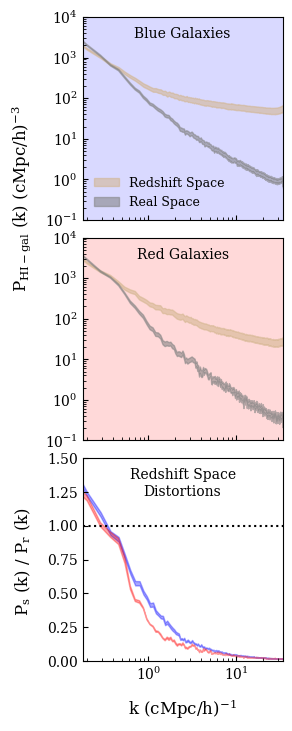

In [14]:
fg.plot()

pkslc = (slice(0,2), slice(None))
# fix the axes
axparams = {}
flib.setNyq(fg, kmin, res, box)
axparams['xscale'] = 'log'
axparams['ylim'] = [0, 1.5]
fg.setAxisParams(axparams)
axparams['yscale'] = 'log'
axparams['ylim'] = [0.1, 1e4]
fg.setAxisParams(axparams, slc=pkslc)
# fix the tick labels
fg.setDefaultTicksParams()
fg.setTicks({'labelsize':smfont, 'direction':'in'})
# labels
kw = {'fontsize':larfont}
ypos = [0, 1 - 0.5*(fg.panel_length * 2 + fg.panel_bt[1] * 1 + fg.yborder[1]) / fg.figsize[1]]
flib.pklabels(fg, ysub = r'\rm{HI-gal}', ypos = ypos, xtxtkw = kw, ytxtkw = kw)
txtkw = {}
txtkw['ha'] = 'center'
txtkw['va'] = 'top'
txtkw['fontsize'] = smfont
fg.setRowLabels(['Blue Galaxies', 'Red Galaxies', 'Redshift Space\nDistortions'], [0.5, 0.95],
               txtkw)
fg.makeYLabel(r'P$_{\rm{s}}$ (k) / P$_{\rm{r}}$ (k)', 
              [0, (0.5 * fg.panel_length + fg.yborder[0]) / fg.figsize[1]], 
              {'va':'center', 'fontsize':larfont})
lkw = {'frameon':False, 'fontsize':smfont - 1, 'loc':'lower left'}
fg.drawLegend(lkw, (0,0))
# lkw['loc'] = 'center right'
# fg.drawLegend(lkw, (2,0))
fcolors = np.empty(fg.dim, dtype = object)
trgba = mpl.colors.to_rgba
alpha = 0.15
fcolors[:,0] = [trgba('blue', alpha), trgba('red', alpha), trgba('white')]
flib.setFacecolor(fg, fcolors)
flib.plotOnes(fg, (2,0))
fg.fig

In [15]:
fg.save("rsd_noall_nolegend.pdf")

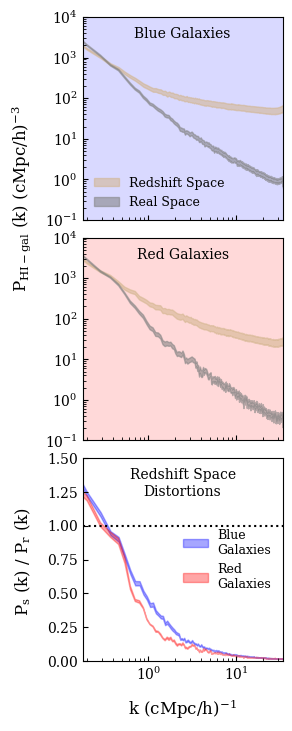

In [16]:
lkw['loc'] = 'center right'
fg.drawLegend(lkw, (2,0))
fg.save("rsd_noall_legend.pdf")
fg.fig

In [17]:
import seaborn as sb

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
# make ratios
rsd = flib.makeRSD(master)
master.dclist.extend(rsd)

# fgrsd = Figrid(rsddl)
# zcols = sb.color_palette('viridis', len(master.getAttrVals('snapshot')))
# fgrsd.arrange('color', 'is_particle', panel_length = 2)
# pargs = {}
# pargs['label'] = 'z=0'
# pargs['color'] = zcols[0]
# pargs['alpha'] = 0.55
# fg.makeFills({'snapshot': 99}, pargs)
# pargs['label'] = 'z=0.5'
# pargs['color'] = zcols[1]
# fg.makeFills({'snapshot':67}, pargs)

In [21]:
%%capture
fg = Figrid(master)
fg.setRowOrder(['blue', 'red', 'resolved'])
fg.setColOrder(['real', 'redshift', 'rsd'])
fg.arrange('space', 'color', panel_length = 2, panel_bt = 0.11, yborder = 0.3)
zcols = sb.color_palette('summer', len(master.getAttrVals('snapshot')))
pargs = {}
pargs['label'] = 'z=0'
pargs['color'] = zcols[0]
pargs['alpha'] = 0.55
fg.makeFills({'snapshot': 99}, pargs)
pargs['label'] = 'z=0.5'
pargs['color'] = zcols[1]
fg.makeFills({'snapshot':67}, pargs)

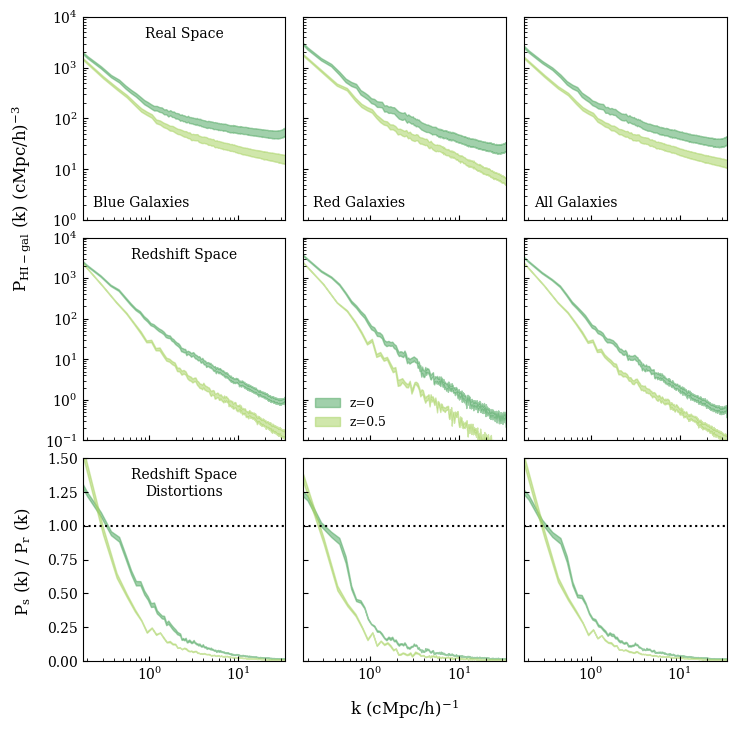

In [22]:
fg.plot()

realslc = (slice(0,1), slice(None))
redshiftslc = (slice(1,2), slice(None))
# fix the axes
axparams = {}
flib.setNyq(fg, kmin, res, box)
axparams['xscale'] = 'log'
axparams['ylim'] = [0, 1.5]
fg.setAxisParams(axparams)
axparams['yscale'] = 'log'
axparams['ylim'] = [0.1, 1e4]
fg.setAxisParams(axparams, slc=redshiftslc)
axparams['ylim'] = [1, 1e4]
fg.setAxisParams(axparams, slc=realslc)
# fix the tick labels
fg.setDefaultTicksParams()
fg.setTicks({'labelsize':smfont, 'direction':'in'})
# labels
kw = {'fontsize':larfont}
ypos = [0, 1 - 0.5*(fg.panel_length * 2 + fg.panel_bt[1] * 1 + fg.yborder[1]) / fg.figsize[1]]
flib.pklabels(fg, ysub = r'\rm{HI-gal}', ypos = ypos, xtxtkw = kw, ytxtkw = kw)
txtkw = {}
txtkw['ha'] = 'center'
txtkw['va'] = 'top'
txtkw['fontsize'] = smfont
fg.setRowLabels(['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'], [0.5, 0.95],
               txtkw)
txtkw['ha'] = 'left'
txtkw['va'] = 'bottom'
fg.setColLabels(['Blue Galaxies', 'Red Galaxies', 'All Galaxies'], [0.05, 0.05], txtkw)
fg.makeYLabel(r'P$_{\rm{s}}$ (k) / P$_{\rm{r}}$ (k)', 
              [0, (0.5 * fg.panel_length + fg.yborder[0]) / fg.figsize[1]], 
              {'va':'center', 'fontsize':larfont})
lkw = {'frameon':False, 'fontsize':smfont - 1, 'loc':'lower left'}
fg.drawLegend(lkw, (1,1))
lkw['loc'] = 'center right'
# fg.drawLegend(lkw, (2,0))
fcolors = np.empty(fg.dim, dtype = object)
trgba = mpl.colors.to_rgba
alpha = 0.15
for i in range(3):
    flib.plotOnes(fg, (2, i))
# fcolors[:,0] = [trgba('blue', alpha), trgba('red', alpha), trgba('white')]
# flib.setFacecolor(fg, fcolors)
fg.fig

In [23]:
fg.save("redshift_evo_all_galaxies.pdf")